In [1]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

import warnings
warnings.filterwarnings("ignore") 

import sys
sys.path.append('../')
from Agnes import Agnes
from utils import report
from DBscan import DBscan 

cmap = 'Spectral'

In [2]:
data = pd.read_csv('datset.csv') 
cat = ['OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel', 'Attrition']
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)
for i in cat:
    data[i] = (data[i].astype('category').cat.codes).apply(np.int64)
X, y = data.drop(['Attrition'], axis=1), data['Attrition']

In [3]:
X, y = np.array(X), list(y) 

data_x = data.drop(['Attrition'], axis=1)
X_standardized = np.array((data_x - data_x.mean()) / data_x.std())
X_normalized = np.array(((data_x - data_x.min()) / (data_x.max() - data_x.min())))

# Sklearn

In [ ]:
from sklearn.cluster import AgglomerativeClustering as SK_Agnes

for similarity, input in zip(['Hamming', 'Manhattan1', 'Manhattan2', 'Manhattan3'], [X, X, X_normalized, X_standardized]):
    for linkage in ['single', 'complete', 'average', 'ward']:
        try:
            agnes = SK_Agnes(2, affinity=similarity.lower()[:-1], linkage=linkage)
            clustering = agnes.fit(input) 
            print(similarity, linkage)
            print('---------------------')
            print(report(y, list(clustering.labels_)))
        except:
            pass

# Graphs

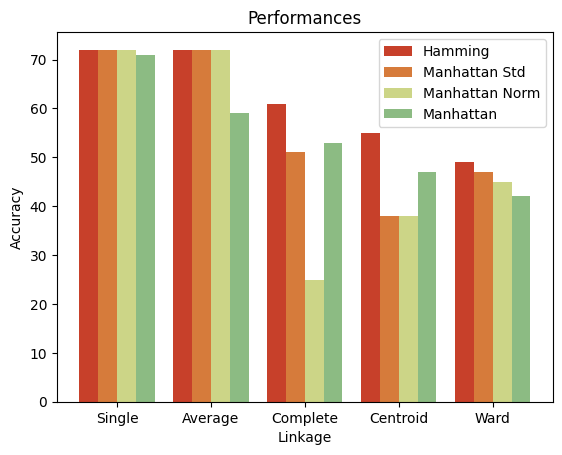

In [5]:
X = ['Single','Average','Complete', 'Centroid', 'Ward']
hamm = [72, 72, 61, 55, 49]
manh = [71, 59, 53, 47, 42]
manh_n = [72, 72, 25, 38, 45]
manh_s = [72, 72, 51, 38, 47] 
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, hamm, 0.2, label = 'Hamming', color='#c7402a')
plt.bar(X_axis - 0.1, manh_s, 0.2, label = 'Manhattan Std', color='#d67b3b')
plt.bar(X_axis + 0.1, manh_n, 0.2, label = 'Manhattan Norm', color='#ccd587')
plt.bar(X_axis + 0.3, manh, 0.2, label = 'Manhattan', color='#8cbb83')
  
plt.xticks(X_axis, X)
plt.xlabel("Linkage") 
plt.ylabel("Accuracy")
plt.title("Performances")
plt.legend()
plt.show()

# Dendrogram

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster = SK_Agnes(2, affinity='hamming', linkage='complete')
cluster.fit_predict(X) 
linked = linkage(X, 'complete') 
labelList = range(1, len(X) + 1)

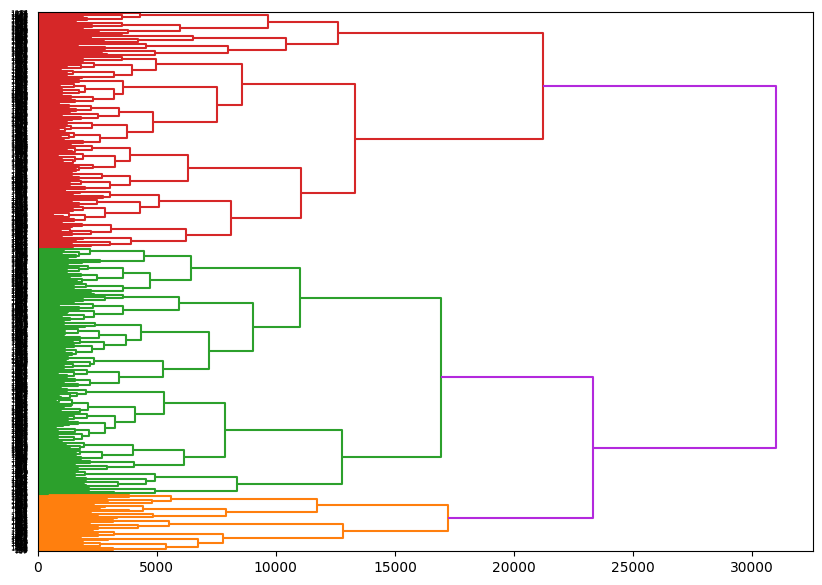

In [40]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,above_threshold_color='#b329dd')
plt.show() 